# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [5]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [6]:
# import t-distrution
from scipy.stats import t

def mean_conf_inter(sample):
    ''''Returns the mean of a given sample, half the size of 95% confidence interval,
    and the values for the 10%, 20%,... 90% probabilities of having mean equal or less than those values'''
    mu = np.mean(sample)
    N = len(sample)
    std_error = np.std(sample) / np.sqrt(N-1)
    # get t-value for N-1 degrees of freedom
    t_val_95_2tailed = t.ppf((1 + 0.95) / 2., N-1)
    conf_95_half_range = t_val_95_2tailed * std_error
    
    # get the values for 10%, 20%,... proba of mean being equal or less than that value
    val10 = mu + t.ppf(0.1, N-1) * std_error
    val20 = mu + t.ppf(0.2, N-1) * std_error
    val30 = mu + t.ppf(0.3, N-1) * std_error
    val40 = mu + t.ppf(0.4, N-1) * std_error
    val50 = mu + t.ppf(0.5, N-1) * std_error
    val60 = mu + t.ppf(0.6, N-1) * std_error
    val70 = mu + t.ppf(0.7, N-1) * std_error
    val80 = mu + t.ppf(0.8, N-1) * std_error
    val90 = mu + t.ppf(0.9, N-1) * std_error
    
    return mu, conf_95_half_range, val10, val20, val30, val40, val50, val60, val70, val80, val90

estimates = df.apply(mean_conf_inter, axis=1)
estimates = pd.DataFrame(estimates.tolist(), 
                         columns=['Mean', 'conf_95_half_range', 'val10', 'val20', 'val30', 'val40', 'val50', 'val60', 'val70', 'val80', 'val90'], 
                         index=estimates.index)
estimates

,Mean,conf_95_half_range,val10,val20,val30,val40,val50,val60,val70,val80,val90
1992,33312.107476,6510.938018,29055.475457,30516.868719,31570.491348,32470.714272,33312.107476,34153.500679,35053.723603,36107.346232,37568.739494
1993,41861.859541,3193.254844,39774.217057,40490.949593,41007.693195,41449.202729,41861.859541,42274.516353,42716.025887,43232.769489,43949.502025
1994,39493.304941,4555.329592,36515.183856,37537.636835,38274.796109,38904.630414,39493.304941,40081.979468,40711.813774,41448.973048,42471.426027
1995,47743.550969,2264.561291,46263.057057,46771.342438,47137.801620,47450.907041,47743.550969,48036.194898,48349.300318,48715.759500,49224.044882


In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [8]:
def bar_coloring(value_of_interest, data):
    '''builds bars representing the expected means of distributions based on given samples, 
    colors the bars depending on value_of_interest relative to those means, from blue if mean is almost certainly 
    under to red if mean is almost certainly above that value_of_interest, 
    and draws a horizontal line at value_of_interest'''
    plt.clf()
    ax = plt.gca()
    
    # define range of colors
    colors = ['blue', 'dodgerblue', 'darkturquoise', 'lightcyan', 'lightyellow', 
             'gold', 'orange', 'darkorange', 'tomato', 'red']
    
    xvals = np.arange(len(data))
    bars = ax.bar(xvals, data['Mean'], width = 0.96, 
                  color = 'lightgrey',
                  yerr=(data['conf_95_half_range']))
    plt.xticks(xvals, data.index)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Draw horizontal line
    ax.axhline(value_of_interest)
    
    # Put a label for it
    trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)
    ax.text(0,value_of_interest, "{:.0f}".format(value_of_interest), color="red", transform=trans, 
        ha="right", va="center")
    
    for i in range(len(bars)):
        if value_of_interest < data.iloc[i]['val10']:
            bars[i].set_color(colors[9])
        elif value_of_interest < data.iloc[i]['val20']:
            bars[i].set_color(colors[8])
        elif value_of_interest < data.iloc[i]['val30']:
            bars[i].set_color(colors[7])
        elif value_of_interest < data.iloc[i]['val40']:
            bars[i].set_color(colors[6])
        elif value_of_interest < data.iloc[i]['val50']:
            bars[i].set_color(colors[5])
        elif value_of_interest < data.iloc[i]['val60']:
            bars[i].set_color(colors[4])
        elif value_of_interest < data.iloc[i]['val70']:
            bars[i].set_color(colors[3])
        elif value_of_interest < data.iloc[i]['val80']:
            bars[i].set_color(colors[2])
        elif value_of_interest < data.iloc[i]['val90']:
            bars[i].set_color(colors[1])
        elif value_of_interest >= data.iloc[i]['val90']:
            bars[i].set_color(colors[0])
        # Add an edge to the bar to keep it visible even if color is very light
        bars[i].set_edgecolor('lightslategrey')
        
    ax.set_title('Please click on the chart to set new value of interest \n(horizontal line)')
            

<IPython.core.display.Javascript object>


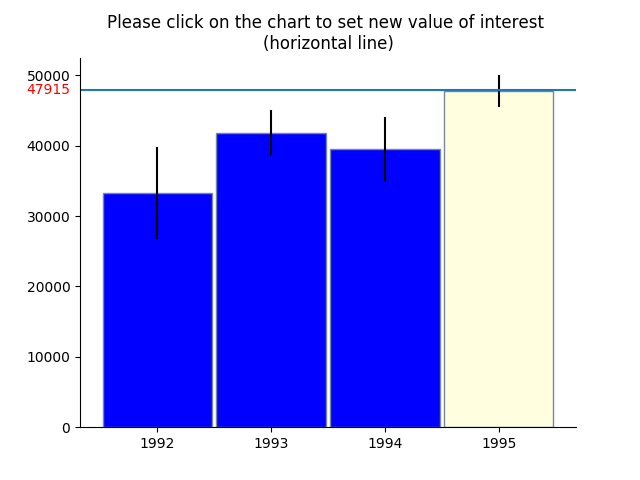

In [9]:
#plt.figure()
def onclick(event):
    bar_coloring(event.ydata, estimates)
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

# initialise figure with a value of interest of 43,000
bar_coloring(43000, estimates)